## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = len(pd.unique(combined_data["Mouse ID"]))
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

filtered_data = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
filtered_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(pd.unique(clean_data["Mouse ID"]))
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
med = clean_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
Var = clean_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
SD = clean_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem = clean_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

stats_summary = pd.DataFrame({'Mean': mean, 'Median': med, 'Variance' : Var, 'standard deviation' : SD, 'SEM': sem})
stats_summary

,Mean,Median,Variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_summary = stats_summary.agg({'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'})
agg_stats_summary



,Mean,Median,Variance,standard deviation,SEM
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0.5, 1.0, 'Unique Mice Per Drug Regimen')

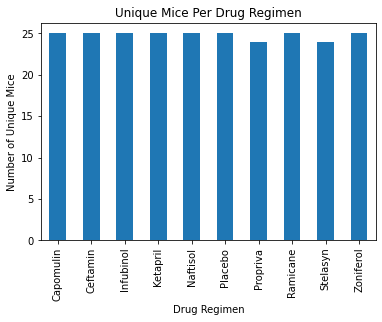

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

unique = clean_data.drop_duplicates(subset="Mouse ID")
unique_df = unique.groupby("Drug Regimen").count()["Mouse ID"]
unique_df.plot.bar("Mouse ID")
plt.ylabel("Number of Unique Mice")
plt.title("Unique Mice Per Drug Regimen")


Text(0.5, 0, 'Drug Regimen')

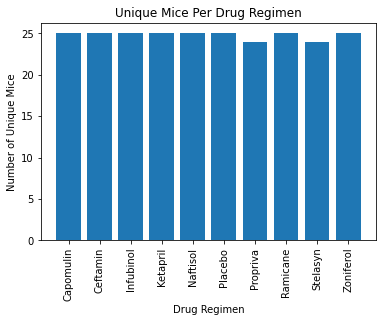

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_names = unique_df.index.tolist()
mice_num= unique.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()

plt.bar(drug_names, mice_num)
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice")
plt.title("Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")

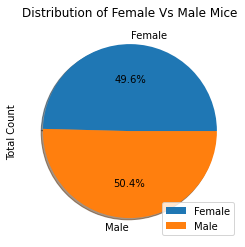

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_totals = pd.DataFrame(unique.groupby(["Sex"]).count())
gender_totals =gender_totals[["Mouse ID"]]
gender_totals =gender_totals.rename(columns = {"Mouse ID" : "Total Count"})
gender_totals.plot.pie(y= "Total Count", shadow= True, autopct="%1.1f%%")
plt.title("Distribution of Female Vs Male Mice")
plt.legend(loc="lower right")

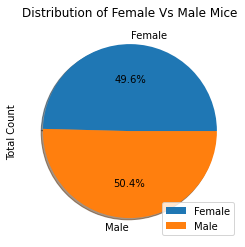

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(gender_totals["Total Count"],labels=labels,shadow= True,autopct="%1.1f%%")
plt.ylabel("Total Count")
plt.title("Distribution of Female Vs Male Mice")
plt.legend(loc="lower right")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
unique2 = clean_data.drop_duplicates(subset="Mouse ID", keep="last")
unique2 = unique2.loc[unique2['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
unique2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
cap_data= unique2[unique2['Drug Regimen'].isin(['Capomulin'])]
quartiles = cap_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
first_q = quartiles[0.25]
third_q = quartiles[0.75]
iqr = third_q-first_q
#Calculate lower/Upper bounds
lower_bound = first_q - (1.5*iqr)
upper_bound = third_q + (1.5*iqr)
print(iqr, lower_bound, upper_bound) 


7.781863460000004 20.70456164999999 51.83201549


In [15]:
 # Determine outliers using upper and lower bounds
outliers = cap_data.loc[(cap_data["Tumor Volume (mm3)"] >= upper_bound) | (cap_data["Tumor Volume (mm3)"] <= lower_bound) , : ]
outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


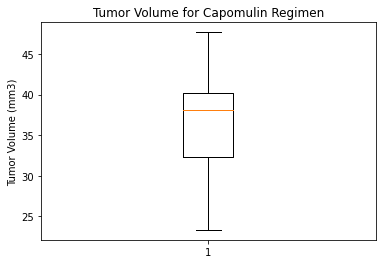

In [16]:
# Generate a box plot
cap_data_df = cap_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.boxplot(cap_data_df)
ax1.set_title('Tumor Volume for Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ramicane
ram_data= unique2[unique2['Drug Regimen'].isin(['Ramicane'])]
quartiles = ram_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
first_q = quartiles[0.25]
third_q = quartiles[0.75]
iqr = third_q-first_q
#Calculate lower/Upper bounds
lower_bound = first_q - (1.5*iqr)
upper_bound = third_q + (1.5*iqr)
print(iqr, lower_bound, upper_bound)
 

9.098536719999998 17.912664470000003 54.30681135


In [18]:
 # Determine outliers using upper and lower bounds
outliers = ram_data.loc[(ram_data["Tumor Volume (mm3)"] >= upper_bound) | (ram_data["Tumor Volume (mm3)"] <= lower_bound) , : ]
outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


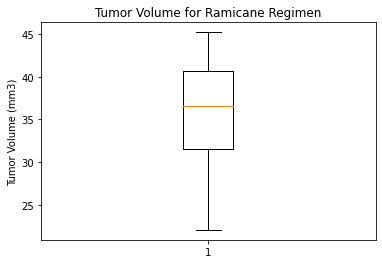

In [19]:
# Generate a box plot
ram_data_df = ram_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.boxplot(ram_data_df)
ax1.set_title('Tumor Volume for Ramicane Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ceftamin
cef_data= unique2[unique2['Drug Regimen'].isin(['Ceftamin'])]
quartiles = cef_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
first_q = quartiles[0.25]
third_q = quartiles[0.75]
iqr = third_q-first_q
#Calculate lower/Upper bounds
lower_bound = first_q - (1.5*iqr)
upper_bound = third_q + (1.5*iqr)
print(iqr, lower_bound, upper_bound)

15.577752179999997 25.355449580000002 87.66645829999999


In [21]:
 # Determine outliers using upper and lower bounds
outliers = cef_data.loc[(cef_data["Tumor Volume (mm3)"] >= upper_bound) | (cef_data["Tumor Volume (mm3)"] <= lower_bound) , : ]
outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


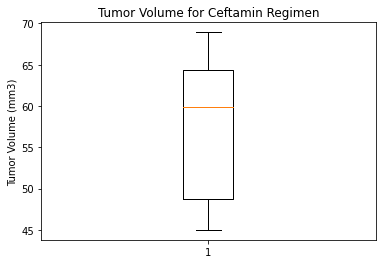

In [22]:
# Generate a box plot
cef_data_df = cef_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.boxplot(cef_data_df)
ax1.set_title('Tumor Volume for Ceftamin Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Infubinol
int_data= unique2[unique2['Drug Regimen'].isin(['Infubinol'])]
quartiles = int_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
first_q = quartiles[0.25]
third_q = quartiles[0.75]
iqr = third_q-first_q
#Calculate lower/Upper bounds
lower_bound = first_q - (1.5*iqr)
upper_bound = third_q + (1.5*iqr)
print(iqr, lower_bound, upper_bound)

11.477135160000003 36.83290494999999 82.74144559000001


In [24]:
 # Determine outliers using upper and lower bounds
outliers = int_data.loc[(int_data["Tumor Volume (mm3)"] >= upper_bound) | (int_data["Tumor Volume (mm3)"] <= lower_bound) , : ]
outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


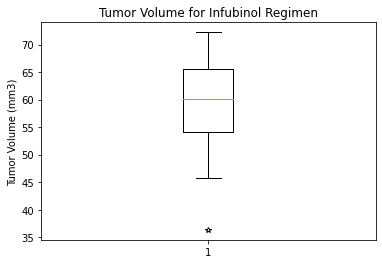

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
int_data_df= int_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.boxplot(int_data_df, sym='*')
ax1.set_title('Tumor Volume for Infubinol Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

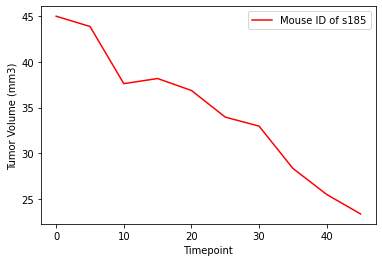

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_time = clean_data[clean_data["Mouse ID"].isin(["s185"])]
tumor_time = tumor_time[["Timepoint", "Tumor Volume (mm3)"]]
tumor_time = tumor_time.set_index("Timepoint")
tumor_time.plot(color='red')
plt.ylabel("Tumor Volume (mm3)")
plt.legend(["Mouse ID of s185"])

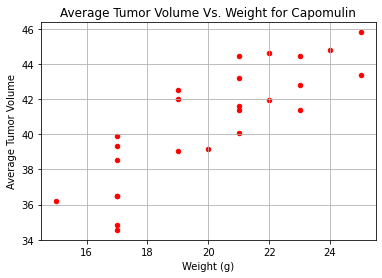

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight= clean_data.loc[(clean_data["Drug Regimen"]) == "Capomulin",["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
tumor_weight=pd.DataFrame(tumor_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
tumor_weight=tumor_weight.set_index('Mouse ID')
tumor_weight=tumor_weight.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
tumor_weight.plot(kind="scatter",x="Weight (g)", y="Average Tumor Volume", grid=True, title="Average Tumor Volume Vs. Weight for Capomulin", color="red" )

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_weight['Weight (g)'], tumor_weight['Average Tumor Volume'])
regress_values = tumor_weight['Weight (g)'] * slope + intercept 
line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
corr = st.pearsonr(tumor_weight['Weight (g)'],tumor_weight['Average Tumor Volume'])
print(line_eq, f"/ R = {corr[0]}")

y = 0.95x + 21.55 / R = 0.8419363424694717


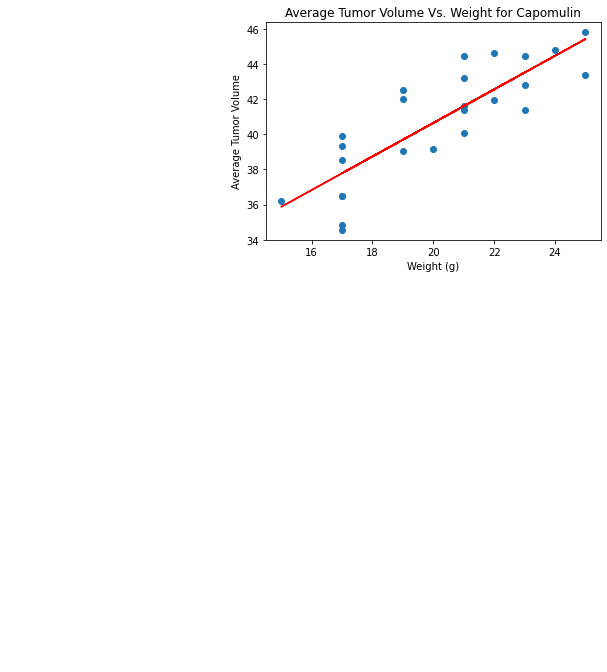

In [29]:
#plot linear model over scatter plot
plt.scatter(tumor_weight['Weight (g)'],tumor_weight['Average Tumor Volume'])
plt.plot(tumor_weight['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Average Tumor Volume Vs. Weight for Capomulin")
plt.show()